## 1. Import the main libraries

In [58]:
# import main ML libraries
# Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import os
import pandas as pd
import numpy as np

# matplotlib import
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# from google.colab import drive
# drive.mount('/content/drive')

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2. Import the dataset

In [37]:
# import the dataset
df = pd.read_csv('data_dropouts.csv', delimiter = ";")

Brief description of the dataset ([here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) the link to it):

the dataset is created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters.

## 3. Exploratory Analysis

In [38]:
# Check the total number of columns, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

We've got **4424** rows and **37** columns, with any missing value.

We've got only *int* and *float* data types among features and an object data type as our target.

Let's destinct the different variables we have. The continuous features are:
- Previous qualification (grade)
- Admission grade
- Curricular grades (1st and 2nd year's grades)
- Unemployment rate
- Inflation rate
- GDP

Other variable are discrete numerical:
- Age at enrollment
- Other curricular variable than curricular grades, like units approved, credited or with no evaluations.

The rest of variables (target included) are categorical, some of which are encoded. This is a major problem to address, because many of these features have multiple levels with which we have to deal in some way.

Moreover, the **target** isn't binary, and this is another problem we need to address. We may choose to drop one of them, if it doesn't relate to sufficient entrances; or we can merge two of them, if we don't loose relevant informations about the phenomenon we're analysing.

Finally, we need to manipulate columns' names in order to work faster with them and correct the name of the "**Nacionality**" feature.

In [39]:
# Rename the column Nationality
df.rename(columns={"Nacionality": "Nationality"}, inplace = True)

In [40]:
# Let's previw the dataset
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Now, I will view the column names to check for leading and trailing spaces.

In [41]:
# view the column names of the dataframe
col_names = df.columns

col_names

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

We need to modify columns' names in order to deal more efficiently with them.

In [42]:
# Let's remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Rename the columns
df.columns = [
    'marital_status','application_mode','application_order','course_id','daytime_attendance','prev_qualification','prev_qual_grade',
    'nationality','mother_qual','father_qual','mother_occupation','father_occupation','admission_grade',
    'is_displaced','special_needs','is_debtor','fees_paid','gender','has_scholarship','age_enrollment',
    'is_international','sem1_units_credited','sem1_units_enrolled','sem1_units_eval','sem1_units_approved',
    'sem1_grade_avg','sem1_units_no_eval','sem2_units_credited','sem2_units_enrolled','sem2_units_eval',
    'sem2_units_approved','sem2_grade_avg','sem2_units_no_eval','unemployment_rate','inflation_rate','gdp','target'
]

# View the renamed columns
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course_id',
       'daytime_attendance', 'prev_qualification', 'prev_qual_grade',
       'nationality', 'mother_qual', 'father_qual', 'mother_occupation',
       'father_occupation', 'admission_grade', 'is_displaced', 'special_needs',
       'is_debtor', 'fees_paid', 'gender', 'has_scholarship', 'age_enrollment',
       'is_international', 'sem1_units_credited', 'sem1_units_enrolled',
       'sem1_units_eval', 'sem1_units_approved', 'sem1_grade_avg',
       'sem1_units_no_eval', 'sem2_units_credited', 'sem2_units_enrolled',
       'sem2_units_eval', 'sem2_units_approved', 'sem2_grade_avg',
       'sem2_units_no_eval', 'unemployment_rate', 'inflation_rate', 'gdp',
       'target'],
      dtype='object')

In [43]:
# Let's check the distribution of our target variable
df["target"].value_counts()

,count
target,
Graduate,2209
Dropout,1421
Enrolled,794


In [44]:
# I want to represent them as percentage
perc_target =  round((df["target"].value_counts() / np.float64(len(df))) * 100, ndigits = 2)
perc_target

,count
target,
Graduate,49.93
Dropout,32.12
Enrolled,17.95


In [45]:
# I want to have a sense of the absolute number of enrolled instances
print((df["target"] == "Enrolled").sum())

794


In order to reduce the classification problem to a binary problem, we may consider to drop rows where the target is equal to "Enrolled". We would lost only the ≈18% of the observation and we wouldn't have a **class imbalance problem**.

In [46]:
# Eliminate the rows where target = "Enrolled"
df.drop(labels = df[df["target"] == "Enrolled"].index, inplace = True)

df["target"].value_counts()

,count
target,
Graduate,2209
Dropout,1421


In [47]:
# Let's reset the index and get a sense of our data frame
df.reset_index(drop = True, inplace = True)
print(df.shape)
print(round(df["target"].value_counts() / np.float64(len(df)) * 100, ndigits = 2))

(3630, 37)
target
Graduate    60.85
Dropout     39.15
Name: count, dtype: float64


Now we have 3630 observations and 36 features plus the target.

Now we focus the analysis on the continuous and numerical discrete variables, just to get a sense of their distribution and detect possible anomalies. Our continuous variables are:
- Previous qualification (grade)
- Admission grade
- Curricular grades (1st and 2nd year's grades)
- Unemployment rate
- Inflation rate
- GDP

In [66]:
df[["prev_qual_grade", "admission_grade", "sem1_grade_avg", "sem2_grade_avg", "unemployment_rate","inflation_rate","gdp"]].describe().round(2)

,prev_qual_grade,admission_grade,sem1_grade_avg,sem2_grade_avg,unemployment_rate,inflation_rate,gdp
count,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00
mean,132.92,127.29,10.53,10.04,11.63,1.23,-0.01
std,13.24,14.61,5.06,5.48,2.67,1.38,2.26
min,95.00,95.00,0.00,0.00,7.60,-0.80,-4.06
25%,125.00,118.00,11.00,10.52,9.40,0.30,-1.70
50%,133.10,126.50,12.34,12.33,11.10,1.40,0.32
75%,140.00,135.10,13.50,13.50,13.90,2.60,1.79
max,190.00,190.00,18.88,18.57,16.20,3.70,3.51


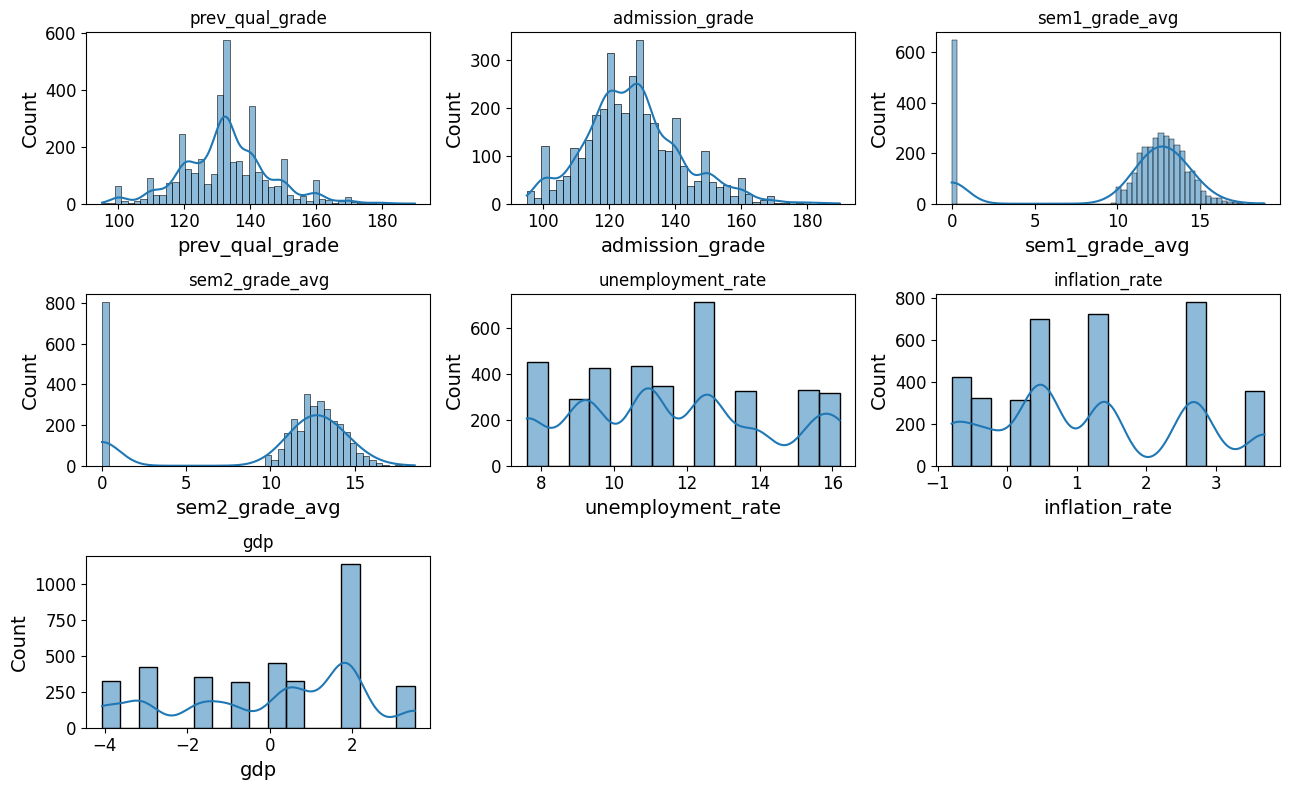

In [69]:
# Let's plot them to get better insights

cont_cols = ["prev_qual_grade", "admission_grade", "sem1_grade_avg", "sem2_grade_avg", "unemployment_rate","inflation_rate","gdp"]

fig, axes = plt.subplots(3, 3, figsize=(13,8))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
  sns.histplot(data = df, x = col, kde = True, ax = axes[i])
  axes[i].set_title(col)

fig.delaxes(axes[7])
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

The analysis reveals three important aspects in the nature of continuous features we've plotted:

**Individual Variables**: *prev_qual_grade* and *admission_grade* exhibit continuous, Gaussian-like distributions, reflecting the natural variance in individual performance.

**Outcome Indicators**: *sem1_grade_avg* and *sem2_grade_avg* display a highly skewed, bimodal distribution. There is a massive, systemic cluster of observations concentrated near zero, followed by a secondary peak around the mean passing grade (12-14). This dense cluster near zero probably represents students who failed all units or prematurely withdrew. This structure is a direct indicator of the negative class outcome.

**Systemic Variables**: *unemployment_rate*, *inflation_rate*, and *gdp* display discrete, multimodal distributions with low cardinality.

This behavior stems from temporal granularity. Students enrolled in the same academic year share identical macroeconomic metrics; therefore, the histogram peaks represent distinct enrollment cohorts.

Reflecting on the way the model may will learn from data, we can hypotize that it will learn the impact of a specific enrollment year (proxied by its economic indicators) rather than the direct effect of economics on a specific student.

Let's now analyse the numerical discrete variables.

In [65]:
# Let's plot them

cols_to_remove = cont_cols + ["target"]
cat_cols_index = df.columns.difference(cols_to_remove)
cat_cols = cat_cols_index.tolist()

print(cat_cols)

['age_enrollment', 'application_mode', 'application_order', 'course_id', 'daytime_attendance', 'father_occupation', 'father_qual', 'fees_paid', 'gender', 'has_scholarship', 'is_debtor', 'is_displaced', 'is_international', 'marital_status', 'mother_occupation', 'mother_qual', 'nationality', 'prev_qualification', 'sem1_grade_avg', 'sem1_units_approved', 'sem1_units_credited', 'sem1_units_enrolled', 'sem1_units_eval', 'sem1_units_no_eval', 'sem2_grade_avg', 'sem2_units_approved', 'sem2_units_credited', 'sem2_units_enrolled', 'sem2_units_eval', 'sem2_units_no_eval', 'special_needs']
